# Efficient Frontier Construction:

While working on the model initially we were struggling a lot in deciding the architecture to be used for model. Then we came up with the idea to derive inspirations from the people who had done amazing previous work in the field [Namely : **Harry Markowitz & Daniel Kahnaman**]
<br>
 <br> - Here Effcient Frontier of the **Modern Portfolio Theory of Harry Markowitz** will be reconstructed 
 <br> - The data has been imported from Quandl using a *specific API Config key* </b>
 <br> - 50,000 portfolios will be generated by randomizing the weights of some the selected companies from the time duration of 01.04.2014 to 31.12.2016  </b>
 
 ## Harry Markowitz :: Proposed the Modern Portfolio Theory | Nobel Prize in 1990
 ![](Images/EFC1.png)

### Reach out
Original work of [**Devang Upadhyay**](https://www.linkedin.com/in/devangupadhyay/) & [**Tapasya Pratap Singh**](https://www.linkedin.com/in/tapasya-pratap-singh-565497153/) under the Guidance of [**Prof. Abhijeet Chandra**](https://www.linkedin.com/in/abhijeetc/), when the former two were working as Research Assistants in the [**Vinod Gupta School of Management, IIT Kharagpur**](https://som.iitkgp.ac.in/)

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = '1FTHT2uxGWdqWyZd1PJG'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                       qopts= {'columns' : ['date', 'ticker', 'adj_close']},
                       date = {'gte': '2014-01-01', 'lte': '2016-12-31'}, paginate= True)


## A peak into the Data

In [3]:
data.head()

,date,ticker,adj_close
None,,,
0,2016-12-30,WMT,67.742045
1,2016-12-29,WMT,67.879254
2,2016-12-28,WMT,67.928257
3,2016-12-27,WMT,68.310482
4,2016-12-23,WMT,68.153672


In [4]:
data.tail()

,date,ticker,adj_close
None,,,
3775,2014-01-08,CNP,19.132992
3776,2014-01-07,CNP,19.334039
3777,2014-01-06,CNP,19.132992
3778,2014-01-03,CNP,19.107861
3779,2014-01-02,CNP,19.116238


In [5]:
clean = data.set_index('date')
table = clean.pivot(columns = 'ticker')
table.head()

adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299

## Understanding the Modern Portfolio Theory 
### ----------------------------------------------------------------------------
### Assumptions:
- Investors are rational and avoid risks whenever possible
- Investors aim for the maximum returns for their investment
- All investors share the aim maximizing their expected returns
- Commissions and taxes on the market are left out of consideration
- All investors have access to the same sources and level of all necessary information about investment decisions
- Investors have unlimited access to borrow and lend money at the risk free rate

In [7]:
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

num_assets = len(selected)
num_portfolios = 50000

returns_daily = table.pct_change()
returns_annual = returns_daily.mean()*250 

cov_daily = returns_daily.cov()
cov_annual = cov_daily*250


for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
portfolio ={'Returns' : port_returns,
           'Volatility' : port_volatility,
           'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(selected):
    portfolio[symbol + ' weight'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

df = df[column_order]

df.head()

,Returns,Volatility,CNP weight,F weight,WMT weight,GE weight,TSLA weight
0,0.062346,0.166346,0.163157,0.239375,0.056245,0.215067,0.326156
1,0.066309,0.179056,0.053363,0.374164,0.218245,0.212199,0.142029
2,0.128782,0.212441,0.343452,0.047264,0.194411,0.385906,0.028968
3,0.020909,0.156539,0.140564,0.436741,0.003260,0.054882,0.364554
4,0.089370,0.227942,0.045242,0.380346,0.050066,0.406824,0.117522


## Efficient Frontier Proposed
![](Images/EFC2.png)

<function matplotlib.pyplot.show(*args, **kw)>

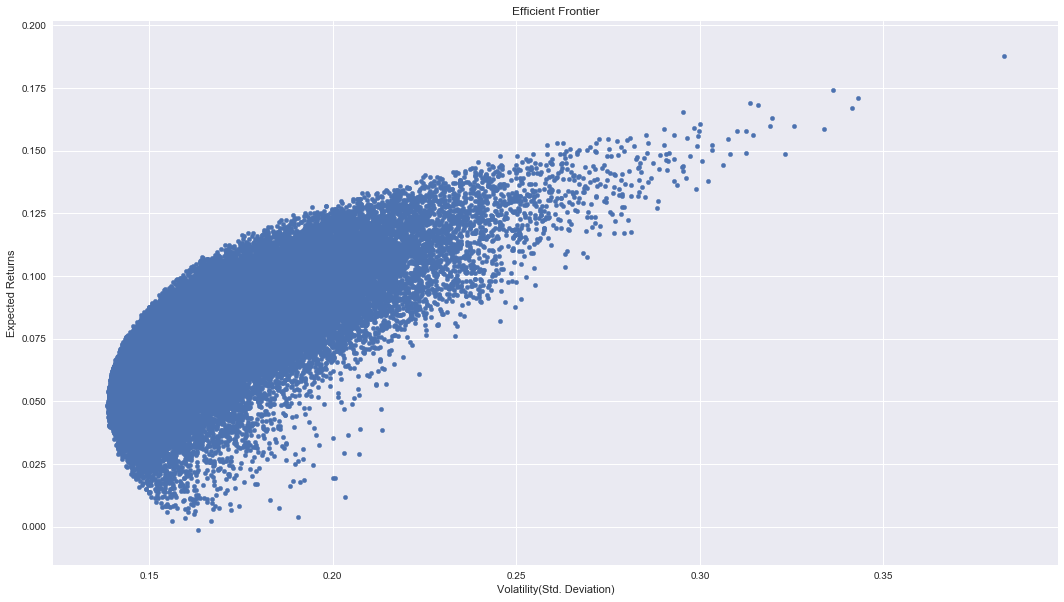

In [8]:
plt.style.use('seaborn')
df.plot.scatter( x= 'Volatility', y = 'Returns', figsize= (18,10), grid = True)
plt.xlabel('Volatility(Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

plt.show